In [1]:
pip install opencv-python numpy matplotlib scikit-image


^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install opencv-python numpy matplotlib scikit-image


Note: you may need to restart the kernel to use updated packages.


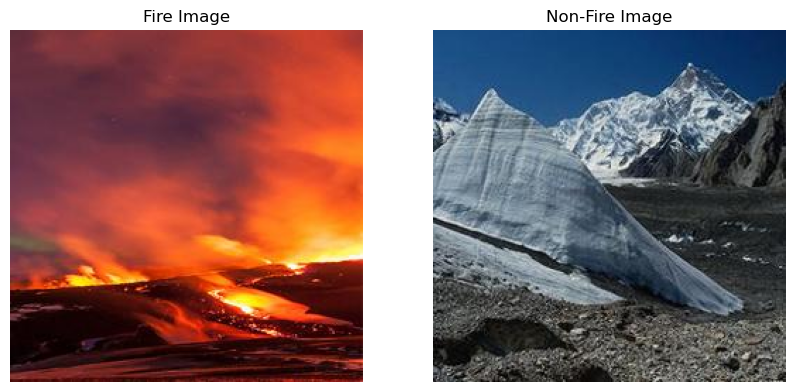

In [3]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Define dataset paths
fire_folder = "C:/Users/spars/Downloads/DIP/forest_fire/Training and Validation/fire"
non_fire_folder = "C:/Users/spars/Downloads/DIP/forest_fire/Training and Validation/nofire"

# Get list of images
fire_images = [os.path.join(fire_folder, img) for img in os.listdir(fire_folder) if img.endswith(('.jpg', '.png'))]
non_fire_images = [os.path.join(non_fire_folder, img) for img in os.listdir(non_fire_folder) if img.endswith(('.jpg', '.png'))]

# Select random images
fire_sample = random.choice(fire_images)
non_fire_sample = random.choice(non_fire_images)

# Load images
fire_img = cv2.imread(fire_sample)
fire_img = cv2.cvtColor(fire_img, cv2.COLOR_BGR2RGB)

non_fire_img = cv2.imread(non_fire_sample)
non_fire_img = cv2.cvtColor(non_fire_img, cv2.COLOR_BGR2RGB)

# Display images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(fire_img)
axes[0].set_title("Fire Image")
axes[0].axis("off")

axes[1].imshow(non_fire_img)
axes[1].set_title("Non-Fire Image")
axes[1].axis("off")

plt.show()


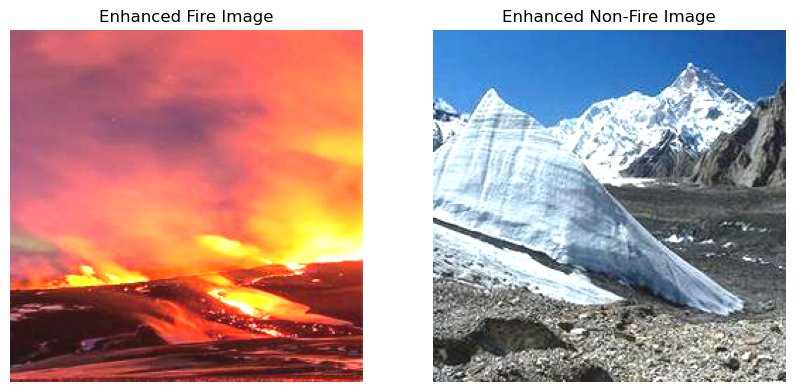

In [5]:
#Step 2: Preprocess Images (Enhancement & Segmentation)
def enhance_image(image):
    alpha = 1.5  # Contrast control
    beta = 20    # Brightness control
    enhanced = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return enhanced

fire_enhanced = enhance_image(fire_img)
non_fire_enhanced = enhance_image(non_fire_img)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(fire_enhanced)
axes[0].set_title("Enhanced Fire Image")
axes[0].axis("off")

axes[1].imshow(non_fire_enhanced)
axes[1].set_title("Enhanced Non-Fire Image")
axes[1].axis("off")

plt.show()


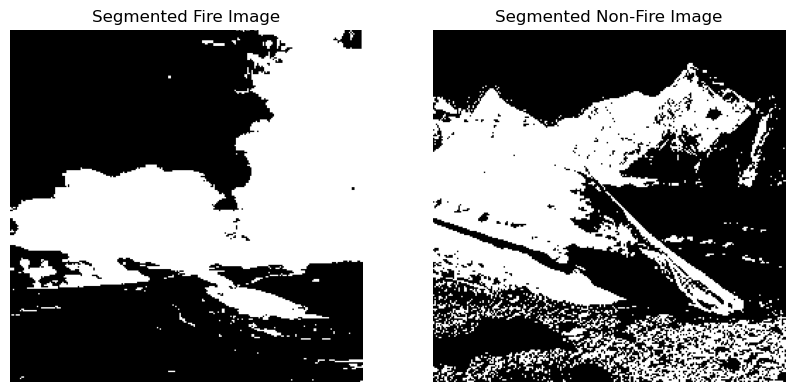

In [7]:
#Step 3: Segmentation & Fire Detection
def segment_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    return thresh

fire_segmented = segment_image(fire_enhanced)
non_fire_segmented = segment_image(non_fire_enhanced)

# Display segmentation results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(fire_segmented, cmap="gray")
axes[0].set_title("Segmented Fire Image")
axes[0].axis("off")

axes[1].imshow(non_fire_segmented, cmap="gray")
axes[1].set_title("Segmented Non-Fire Image")
axes[1].axis("off")

plt.show()



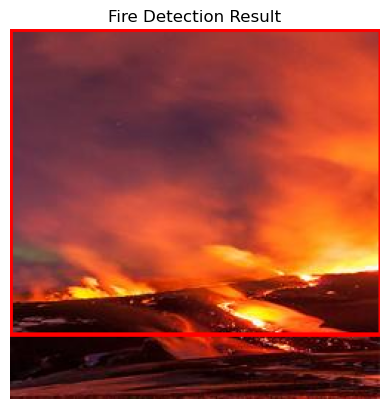

In [9]:
#Step 4: Fire Detection (Bounding Box Around Fire) 
   
def detect_fire(image, original_image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    output = original_image.copy()
    
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter small objects
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(output, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
    return output

fire_detected = detect_fire(fire_segmented, fire_img)

plt.imshow(fire_detected)
plt.title("Fire Detection Result")
plt.axis("off")
plt.show()
